# AMADEUS CHALLENGE 

In [1]:
#Import libraries I am going to use
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
%matplotlib inline
plt.style.use('seaborn')
import bz2

In [2]:
%automagic
#automagic is OFF (this means we need to use the prefix ! to work in Python with shell )


Automagic is OFF, % prefix IS needed for line magics.


In [3]:
#shell scripting : get 10.000 rows from bookings.csv.bz2 compressed file and export to bookings.sample.csv
!bzcat /home/dsc/Data/challenge/bookings.csv.bz2 | head -10000 > bookings.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = /home/dsc/Data/challenge/bookings.csv.bz2, output file = (stdout)


## Exercise 1

### Working with sample

In [4]:
#count lines of the content of the compressed file with shell.
! bzcat bookings.sample.csv.bz2 | wc -l

10000


In [5]:
#with Python we read the compressed file bz2 (we have other sentence for zip)
import bz2
fileBz2=bz2.BZ2File('/home/dsc/Downloads/bookings.sample.csv.bz2')

In [6]:
#Now , we create an iterator to count the number of rows of the compressed 
#file as we did before with shell scripting
fileBz2=bz2.BZ2File('/home/dsc/Downloads/bookings.sample.csv.bz2')
k=0
for line in fileBz2:
    k+=1
print(k)

10000


In [7]:
#if we work like that we need to close the file everytime we open
fileBz2.closed

False

In [8]:
#smarter and we dont need to close the file everytime we use it 
with bz2.BZ2File('/home/dsc/Downloads/bookings.sample.csv.bz2') as fileBz2:
    k=0
    for line in fileBz2:
        k+=1
        
print(k)

# is much better option to do this to open files

10000


## Exercise 2

### Working with sample

In [9]:
#We read the sample as we use to read csv in pandas , including the separator, in this particular case ='^'
DATA=pd.read_csv('/home/dsc/Data/DSMaster/DSMaster/bookings.sample.csv',sep='^')

In [10]:
## We  need to explore the dataset so I count rows and columns of it.
#Also we see that columns hace white spaces so we need to solve it.
DATA.info()
DATA.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 38 columns):
act_date               9999 non-null object
source                 9999 non-null object
pos_ctry               9999 non-null object
pos_iata               9999 non-null object
pos_oid                9999 non-null object
rloc                   9999 non-null object
cre_date               9999 non-null object
duration               9999 non-null int64
distance               9999 non-null int64
dep_port               9999 non-null object
dep_city               9999 non-null object
dep_ctry               9999 non-null object
arr_port               9999 non-null object
arr_city               9999 non-null object
arr_ctry               9999 non-null object
lst_port               9999 non-null object
lst_city               9999 non-null object
lst_ctry               9999 non-null object
brd_port               9999 non-null object
brd_city               9999 non-null object
brd_ctry       

Index(['act_date           ', 'source', 'pos_ctry', 'pos_iata', 'pos_oid  ',
       'rloc          ', 'cre_date           ', 'duration', 'distance',
       'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry',
       'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry',
       'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry',
       'intl', 'route          ', 'carrier', 'bkg_class', 'cab_class',
       'brd_time           ', 'off_time           ', 'pax', 'year', 'month',
       'oid      '],
      dtype='object')

In [11]:
#We see the NaNs for each column to see if the data is ready to work.
DATA.isna().sum()

act_date               0
source                 0
pos_ctry               0
pos_iata               0
pos_oid                0
rloc                   0
cre_date               0
duration               0
distance               0
dep_port               0
dep_city               0
dep_ctry               0
arr_port               0
arr_city               0
arr_ctry               0
lst_port               0
lst_city               0
lst_ctry               0
brd_port               0
brd_city               0
brd_ctry               0
off_port               0
off_city               0
off_ctry               0
mkt_port               0
mkt_city               0
mkt_ctry               0
intl                   0
route                  0
carrier                0
bkg_class              0
cab_class              0
brd_time               0
off_time               0
pax                    0
year                   0
month                  0
oid                    0
dtype: int64

In [12]:
#We need to solve problems with white spaces in columns , so we are going to use the function strip()
lista_columnas=[]
for i in DATA.columns:
    lista_columnas.append(i.strip())

DATA.columns=lista_columnas

In [13]:
DATA['arr_port']=DATA['arr_port'].str.upper()
#to make sure the group by is doing well

In [14]:
#count passengers in the airport and sort it by airport
airport_passengers=DATA.groupby(['arr_port'])['pax'].sum()
Top_10=airport_passengers.sort_values(ascending=False).head(10).apply(int)
#apply int to have smarter the count result

In [15]:
#Export result 
Top_10.to_csv('Top_10_001.csv')

### Working with Big Data 

In [16]:
#We import this library to know how is going the execution (because with big files is not instant)
from tqdm import tqdm

In [17]:
lista=[]
group_airport_passengers=pd.DataFrame()
for chunk in tqdm(pd.read_csv('/home/dsc/Data/DSMaster/DSMaster/bookings.csv.bz2',sep='^',chunksize=10000)):
    lista.append(len(chunk))
    
    lista_columnas=[]
    for i in chunk.columns:
        lista_columnas.append(i.strip())
        
    chunk.columns=lista_columnas
    
    chunk=chunk[['arr_port','pax']] 
    
    chunk['arr_port']=chunk['arr_port'].str.upper()
    
    airport_passengers=chunk.groupby(['arr_port'])['pax'].sum().to_frame()  
    
    group_airport_passengers=group_airport_passengers.append(airport_passengers)


longitud = sum(lista)
#length of file
grupo=group_airport_passengers.groupby(['arr_port']).sum()
Top_10=grupo.sort_values(by='pax',ascending=False).head(10)
Top_10['pax']=Top_10['pax'].apply(int)
#the same as we did with sample but iterative because there are too much data

0it [00:00, ?it/s]/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
1001it [04:01,  4.29it/s]


In [18]:
print('The length of bookings file is '+ str(longitud))

The length of bookings file is 10000010


In [73]:
top_airports=grupo.sort_values(by='pax',ascending=False)
top_airports=pd.Series(top_airports.index.str.strip()).to_frame()
top_airports.to_csv('top_airports.csv',sep='^',index=False)

In [19]:
#Export the result
Top_10.to_csv('Top_10_002.csv')

# 3 ejercicio

### Working with sample

In [20]:
#We use shell to export a sample of searches file 
!bzcat /home/dsc/Data/challenge/searches.csv.bz2 | head -50000 > searches.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = /home/dsc/Data/challenge/searches.csv.bz2, output file = (stdout)


In [21]:
#we read searches
Searches=pd.read_csv('/home/dsc/Data/DSMaster/DSMaster/searches.sample.csv',sep='^')

In [22]:
#Exploring the dataset
Searches.info()
Searches.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 45 columns):
Date                 49999 non-null object
Time                 49999 non-null object
TxnCode              49999 non-null object
OfficeID             49999 non-null object
Country              49989 non-null object
Origin               49999 non-null object
Destination          49999 non-null object
RoundTrip            49999 non-null int64
NbSegments           49999 non-null int64
Seg1Departure        49999 non-null object
Seg1Arrival          49999 non-null object
Seg1Date             49818 non-null object
Seg1Carrier          19842 non-null object
Seg1BookingCode      5651 non-null object
Seg2Departure        36165 non-null object
Seg2Arrival          36165 non-null object
Seg2Date             35944 non-null object
Seg2Carrier          14113 non-null object
Seg2BookingCode      4878 non-null object
Seg3Departure        2703 non-null object
Seg3Arrival          2703 non-null o

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [23]:
Searches.isna().sum()
#only we need this because the exercise does not rquired more

Date                     0
Time                     0
TxnCode                  0
OfficeID                 0
Country                 10
Origin                   0
Destination              0
RoundTrip                0
NbSegments               0
Seg1Departure            0
Seg1Arrival              0
Seg1Date               181
Seg1Carrier          30157
Seg1BookingCode      44348
Seg2Departure        13834
Seg2Arrival          13834
Seg2Date             14055
Seg2Carrier          35886
Seg2BookingCode      45121
Seg3Departure        47296
Seg3Arrival          47296
Seg3Date             47314
Seg3Carrier          47398
Seg3BookingCode      47458
Seg4Departure        47767
Seg4Arrival          47767
Seg4Date             47779
Seg4Carrier          47783
Seg4BookingCode      47800
Seg5Departure        49540
Seg5Arrival          49540
Seg5Date             49544
Seg5Carrier          49543
Seg5BookingCode      49548
Seg6Departure        49718
Seg6Arrival          49718
Seg6Date             49719
S

In [24]:
#we do the same as we did with bookings, just in case columns have white spaces.
lista_columnas=[]
for i in Searches.columns:
    lista_columnas.append(i.strip())
    
Searches.columns=lista_columnas

In [25]:
#Filtering by 2 columns the dataset
Searches=Searches[['Date','Destination']]

In [26]:
#because the group is important to make sure that does not have lower and upper letters.
Searches['Destination']=Searches['Destination'].str.upper()

In [27]:
#Creating a new columns named YearMonth with the column date.
Searches['YearMonth']=Searches['Date'].str[0:7]

In [28]:
#Filtering data by 2 columns and by values MAD,BCN adn AGP in Destination
Searches=Searches[['YearMonth','Destination']]
Searches=Searches[(Searches['Destination']=='MAD')|(Searches['Destination']=='BCN')|(Searches['Destination']=='AGP')]

In [29]:
#use groupby to see how many searches are by month.
aggregated=Searches.groupby(['YearMonth','Destination'])['Destination'].agg(['count']).reset_index()

In [30]:
aggregated

,YearMonth,Destination,count
0,2013-01,AGP,169
1,2013-01,BCN,517
2,2013-01,MAD,425
3,2013-02,AGP,97
4,2013-02,BCN,357
5,2013-02,MAD,284


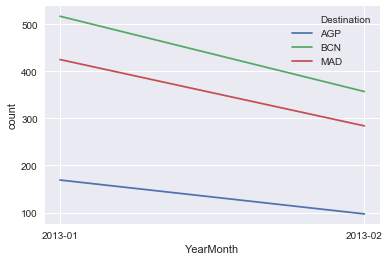

In [31]:
#Now we plot it
import seaborn as sns
sns.lineplot(data=aggregated,x='YearMonth',y='count',hue='Destination')

#this is only a sample for 2 months , for that are only 2 points in each line

### Working with Big Data

In [32]:
from tqdm import tqdm
#to see the process of iterations

In [33]:
#With this dataset we are going to drop duplicates.

In [34]:
all_chunks=pd.DataFrame()

for chunk in tqdm(pd.read_csv('/home/dsc/Data/DSMaster/DSMaster/searches.csv.bz2',sep='^',chunksize=400000)):
    
    lista_columnas=[]
    for i in chunk.columns:
        lista_columnas.append(i.strip())
        
    chunk.columns=lista_columnas
    
    all_chunks=all_chunks.append(chunk)
    
    all_chunks.drop_duplicates(inplace=True)
    
    break
     
    #we did this because we know there were many duplicates so we can do this.
    

0it [00:00, ?it/s]/home/dsc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):



In [35]:
#Now we did without that duplicates we can manage the dataset normally.

In [36]:
Searches=all_chunks
Searches.to_csv('Searches_noduplicates.csv',sep='^',index=False)
Searches=Searches[['Date','Destination']]

In [37]:
Searches['YearMonth']=Searches['Date'].str[0:7]

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
Searches=Searches[['YearMonth','Destination']]
Searches=Searches[(Searches['Destination']=='MAD')|(Searches['Destination']=='BCN')|(Searches['Destination']=='AGP')]

In [39]:
aggregated=Searches.groupby(['YearMonth','Destination'])['Destination'].agg(['count']).reset_index()

[Text(0, 0, '2013-01'),
 Text(0, 0, '2013-01'),
 Text(0, 0, '2013-01'),
 Text(0, 0, '2013-02'),
 Text(0, 0, '2013-02'),
 Text(0, 0, '2013-02'),
 Text(0, 0, '2013-03'),
 Text(0, 0, '2013-03'),
 Text(0, 0, '2013-03'),
 Text(0, 0, '2013-04'),
 Text(0, 0, '2013-04'),
 Text(0, 0, '2013-04')]

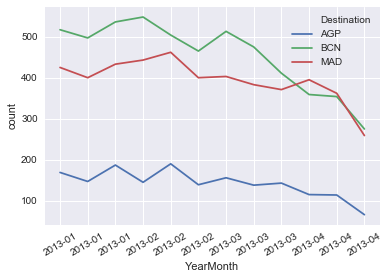

In [40]:
g=sns.lineplot(data=aggregated,x='YearMonth',y='count',hue='Destination')
g.set_xticklabels(rotation=30,labels=aggregated['YearMonth'])

## 4 Exercise

In [41]:
#creating the routes
path_bookings = '/home/dsc/Data/DSMaster/DSMaster/bookings.csv.bz2'
path_searches = '/home/dsc/Data/DSMaster/DSMaster/searches.csv.bz2'
path_bookings_wn_dup = '/home/dsc/Data/DSMaster/DSMaster/bookings_wn_dup.csv'
path_searches_wn_dup = '/home/dsc/Data/DSMaster/DSMaster/searches_wn_dup.csv'

In [42]:
#remove duplicates from searchings file

bi=pd.read_csv(path_searches, sep="^", chunksize=100000, low_memory=False, dtype=str)
all_chunks=pd.DataFrame()

for i, chunk in enumerate(bi):
    print(i, len(all_chunks))
    all_chunks=all_chunks.append(chunk)
    all_chunks.drop_duplicates(inplace=True)
all_chunks.columns=all_chunks.columns.str.strip()   
all_chunks.to_csv(path_searches_wn_dup, sep='^', index=False)

0 0
1 100000
2 199999
3 299999
4 358999
5 358999
6 358999
7 358999
8 358999
9 358999
10 358999
11 358999
12 358999
13 358999
14 358999
15 359003
16 359003
17 359003
18 359003
19 359003
20 359003
21 359003
22 359003
23 359003
24 359003
25 359003
26 359003
27 359003
28 359003
29 359003
30 359003
31 359003
32 359003
33 359003
34 359003
35 359003
36 359003
37 359003
38 359003
39 359003
40 359003
41 359003
42 359003
43 359003
44 359003
45 359003
46 359003
47 359003
48 359003
49 359003
50 359003
51 359003
52 359003
53 359003
54 359003
55 359003
56 359003
57 359003
58 359003
59 359003
60 359003
61 359003
62 359003
63 359003
64 359003
65 359003
66 359003
67 359003
68 359003
69 359003
70 359003
71 359003
72 359003
73 359003
74 359003
75 359003
76 359003
77 359003
78 359003
79 359003
80 359003
81 359003
82 359003
83 359003
84 359003
85 359003
86 359003
87 359003
88 359003
89 359003
90 359003
91 359003
92 359003
93 359003
94 359003
95 359003
96 359003
97 359003
98 359003
99 359003
100 359003
101 

In [43]:
#remove duplicates from bookings file

bi=pd.read_csv(path_bookings, sep="^", chunksize=100000, low_memory=False, dtype=str)
all_chunks=pd.DataFrame()

for i, chunk in enumerate(bi):
    print(i, len(all_chunks))
    all_chunks=all_chunks.append(chunk)
    all_chunks.drop_duplicates(inplace=True)
all_chunks.columns=all_chunks.columns.str.strip()   
all_chunks.to_csv(path_bookings_wn_dup, sep='^', index=False)

0 0
1 100000
2 200000
3 300000
4 400000
5 500000
6 600000
7 700000
8 800000
9 900000
10 1000000
11 1000000
12 1000000
13 1000000
14 1000000
15 1000000
16 1000000
17 1000000
18 1000000
19 1000000
20 1000000
21 1000000
22 1000000
23 1000000
24 1000000
25 1000000
26 1000000
27 1000000
28 1000000
29 1000000
30 1000000
31 1000000
32 1000000
33 1000000
34 1000000
35 1000000
36 1000000
37 1000000
38 1000000
39 1000000
40 1000000
41 1000000
42 1000000
43 1000000
44 1000000
45 1000000
46 1000000
47 1000000
48 1000000
49 1000000
50 1000000
51 1000003
52 1000003
53 1000003
54 1000003
55 1000003
56 1000003
57 1000003
58 1000003
59 1000003
60 1000003
61 1000003
62 1000003
63 1000003
64 1000003
65 1000003
66 1000003
67 1000003
68 1000003
69 1000003
70 1000003
71 1000003
72 1000003
73 1000003
74 1000003
75 1000003
76 1000003
77 1000003
78 1000003
79 1000003
80 1000003
81 1000003
82 1000003
83 1000003
84 1000003
85 1000003
86 1000003
87 1000003
88 1000003
89 1000003
90 1000003
91 1000003
92 1000003
93

In [44]:
searches=pd.read_csv(path_searches_wn_dup,sep='^')
bookings=pd.read_csv(path_bookings_wn_dup,sep='^')

/home/dsc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/dsc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7,8,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
searches.info(),searches.columns,searches.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359004 entries, 0 to 359003
Data columns (total 45 columns):
Date                 359004 non-null object
Time                 359003 non-null object
TxnCode              359003 non-null object
OfficeID             359003 non-null object
Country              358960 non-null object
Origin               359003 non-null object
Destination          359003 non-null object
RoundTrip            359002 non-null float64
NbSegments           359002 non-null float64
Seg1Departure        359002 non-null object
Seg1Arrival          359002 non-null object
Seg1Date             357977 non-null object
Seg1Carrier          135460 non-null object
Seg1BookingCode      36608 non-null object
Seg2Departure        254959 non-null object
Seg2Arrival          254959 non-null object
Seg2Date             253740 non-null object
Seg2Carrier          94220 non-null object
Seg2BookingCode      31470 non-null object
Seg3Departure        18714 non-null object
Seg3Arrival

(None, Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
        'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
        'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
        'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
        'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
        'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
        'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
        'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
        'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
        'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
        'IsFromVista', 'TerminalID', 'InternetOffice'],
       dtype='object'), Date                      0
 Time                      1
 TxnCode                   1
 OfficeID                  1
 Country                  44
 Origin                    1
 Destination               1
 RoundTrip     

In [46]:
bookings.info(),bookings.columns,bookings.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000003 entries, 0 to 1000002
Data columns (total 38 columns):
act_date     1000003 non-null object
source       1000003 non-null object
pos_ctry     1000002 non-null object
pos_iata     1000003 non-null object
pos_oid      1000003 non-null object
rloc         1000003 non-null object
cre_date     1000003 non-null object
duration     1000003 non-null object
distance     1000003 non-null object
dep_port     1000003 non-null object
dep_city     1000003 non-null object
dep_ctry     1000003 non-null object
arr_port     1000003 non-null object
arr_city     1000003 non-null object
arr_ctry     1000003 non-null object
lst_port     1000003 non-null object
lst_city     1000003 non-null object
lst_ctry     1000003 non-null object
brd_port     1000003 non-null object
brd_city     1000002 non-null object
brd_ctry     1000003 non-null object
off_port     1000003 non-null object
off_city     1000003 non-null object
off_ctry     1000003 non-null object

(None, Index(['act_date', 'source', 'pos_ctry', 'pos_iata', 'pos_oid', 'rloc',
        'cre_date', 'duration', 'distance', 'dep_port', 'dep_city', 'dep_ctry',
        'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry',
        'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city', 'off_ctry',
        'mkt_port', 'mkt_city', 'mkt_ctry', 'intl', 'route', 'carrier',
        'bkg_class', 'cab_class', 'brd_time', 'off_time', 'pax', 'year',
        'month', 'oid'],
       dtype='object'), act_date     0
 source       0
 pos_ctry     1
 pos_iata     0
 pos_oid      0
 rloc         0
 cre_date     0
 duration     0
 distance     0
 dep_port     0
 dep_city     0
 dep_ctry     0
 arr_port     0
 arr_city     0
 arr_ctry     0
 lst_port     0
 lst_city     0
 lst_ctry     0
 brd_port     0
 brd_city     1
 brd_ctry     0
 off_port     0
 off_city     0
 off_ctry     0
 mkt_port     0
 mkt_city     0
 mkt_ctry     0
 intl         0
 route        0
 carrier      0
 bkg_cla

In [47]:
#see the length of both tables
len(bookings),len(searches)

(1000003, 359004)

In [49]:
#we do the merge between searches and bookings
import pandas as pd
bookings=pd.read_csv('bookings_wn_dup.csv', sep='^', usecols=['act_date', 'dep_port', 'arr_port'])
searches=pd.read_csv('searches_wn_dup.csv', sep='^', low_memory=False)
bookings.drop_duplicates(inplace=True)
bookings.columns=bookings.columns.str.strip()
bookings['arr_port']=bookings['arr_port'].str.strip()
bookings['dep_port']=bookings['dep_port'].str.strip()
bookings['act_date']=bookings['act_date'].str[0:10]
searches['Date']=searches['Date'].str[0:10]
bookings['Booked']=1

searches_bookings=searches.merge(bookings,
            how='left', 
            left_on=['Date', 'Origin', 'Destination'],
            right_on=['act_date', 'dep_port', 'arr_port'])

searches_bookings['Booked']=searches_bookings['Booked'].fillna(0)
searches_bookings.drop(['act_date', 'dep_port', 'arr_port'], axis=1, inplace=True)
searches_bookings=searches_bookings.astype({'Booked':int})
searches_bookings[searches_bookings['Booked']==1 ].sample(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,Booked
261188,2013-09-19,17:46:58,FXX,39964172ed1a0ec40ac97a44a68b8951,FR,CDG,BKO,1.0,2.0,CDG,...,NaN,NaN,NaN,1ASI,0,0,0,1c30109a5293c01529ce93809462530e,0,1
153743,2013-06-03,15:01:20,FQP,ba6ba4349ea26fe4eeed65acc7645415,FR,CMN,ORY,0.0,1.0,CMN,...,NaN,NaN,NaN,1ASI,0,0,0,b33b9678b012a235e922a8f2651296ce,MLH,1
28668,2013-01-29,13:11:05,FXX,a13c1924b60958f74d56d109255a0a78,ES,AMS,MAD,1.0,2.0,AMS,...,NaN,NaN,NaN,1ASI,0,0,0,98aef6e6d34f6c028002554002670821,BCN,1
14298,2013-01-15,05:11:55,MPT,b04e0620a297a1b50819d31535aa5b61,US,BOS,SJU,1.0,2.0,BOS,...,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,DTW,1
301423,2013-10-29,07:52:02,FFP,3fb2dcb9369b6c67f40182b9bce4beb3,ES,MAD,LIS,0.0,1.0,MAD,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0,1


In [51]:
searches_bookings.to_csv('searches_with_bookings.csv', sep='^', index=False)